In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('tennis.csv')

In [3]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,NaN,A,20181231,243,106034,NaN,NaN,...,37.0,28.0,14.0,11.0,5.0,8.0,185.0,275.0,136.0,421.0
1,2019-M020,Brisbane,Hard,NaN,A,20181231,244,117360,NaN,NaN,...,65.0,49.0,23.0,16.0,4.0,7.0,166.0,318.0,99.0,590.0
2,2019-M020,Brisbane,Hard,NaN,A,20181231,245,106423,NaN,NaN,...,44.0,31.0,7.0,9.0,5.0,7.0,146.0,367.0,119.0,482.0
3,2019-M020,Brisbane,Hard,NaN,A,20181231,246,106426,3.0,NaN,...,33.0,28.0,9.0,10.0,2.0,4.0,84.0,650.0,NaN,NaN
4,2019-M020,Brisbane,Hard,NaN,A,20181231,247,200175,7.0,NaN,...,21.0,12.0,7.0,7.0,3.0,8.0,131.0,433.0,297.0,125.0


In [4]:
df.drop(df[df.winner_hand == 'U'].index, axis = 0, inplace = True)
df.drop(df[df.loser_hand == 'U'].index, axis = 0, inplace = True)

In [5]:
dff = df.loc[:,['winner_hand', 'loser_hand']]

In [6]:
dff

,winner_hand,loser_hand
0,R,R
2,R,R
4,R,R
5,R,L
7,R,L
9,R,R
10,R,R
11,L,R
12,R,R
14,R,R


In [8]:
a = dff['winner_hand'] == 'R'
b = dff['loser_hand']  == 'L'
c = a == b
d = dff[c]

In [9]:
d['success'] = d['winner_hand'].replace({'R' : 'success' , 'L' : 'Failure'})


C:\Users\N827941\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
d.head()

,winner_hand,loser_hand,success
5,R,L,success
7,R,L,success
11,L,R,Failure
23,L,R,Failure
25,L,R,Failure


In [11]:
ctab = pd.DataFrame({'Right' : [sum(df.winner_hand == 'R'), sum(df.loser_hand == 'R')],
                     'Left' : [sum(df.winner_hand == 'L'), sum(df.loser_hand == 'L')]}, index = ['winners', 'losers'])

In [12]:
ctab.sum()

Right    1558
Left      255
dtype: int64

In [13]:
ctab.sum()

Right    1558
Left      255
dtype: int64

p(w|R) = P(w and R)/P(R)

In [14]:
p =  (ctab.iloc[0,0]/ctab.sum().sum())/(ctab.sum()[0]/ctab.sum().sum())

In [15]:
d.shape

(229, 3)

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

k = np.arange(0,229, 1)
k.sort()
n = 229
binomial = stats.binom.pmf(k,n,p)
binomial

array([5.01685490e-69, 1.13420595e-66, 1.27650250e-64, 9.53566907e-63,
       5.31893296e-61, 2.36299024e-59, 8.70930690e-58, 2.73914685e-56,
       7.50417928e-55, 1.81918917e-53, 3.95116751e-52, 7.76607838e-51,
       1.39284220e-49, 2.29531976e-48, 3.49618019e-47, 4.94727335e-46,
       6.53257788e-45, 8.08053612e-44, 9.39568460e-43, 1.03010663e-41,
       1.06781589e-40, 1.04917581e-39, 9.79295639e-39, 8.70124161e-38,
       7.37330340e-37, 5.96899005e-36, 4.62362467e-35, 3.43194046e-34,
       2.44431954e-33, 1.67255704e-32, 1.10081560e-31, 6.97639171e-31,
       4.26158316e-30, 2.51158657e-29, 1.42938824e-28, 7.86215622e-28,
       4.18278745e-27, 2.15400288e-26, 1.07445643e-25, 5.19496310e-25,
       2.43613289e-24, 1.10867389e-23, 4.89933659e-23, 2.10346517e-22,
       8.77850361e-22, 3.56290797e-21, 1.40698509e-20, 5.40838530e-20,
       2.02452280e-19, 7.38295234e-19, 2.62396153e-18, 9.09212121e-18,
       3.07260529e-17, 1.01304577e-16, 3.25966429e-16, 1.02393675e-15,
      

Text(0, 0.5, 'Probability of Successes')

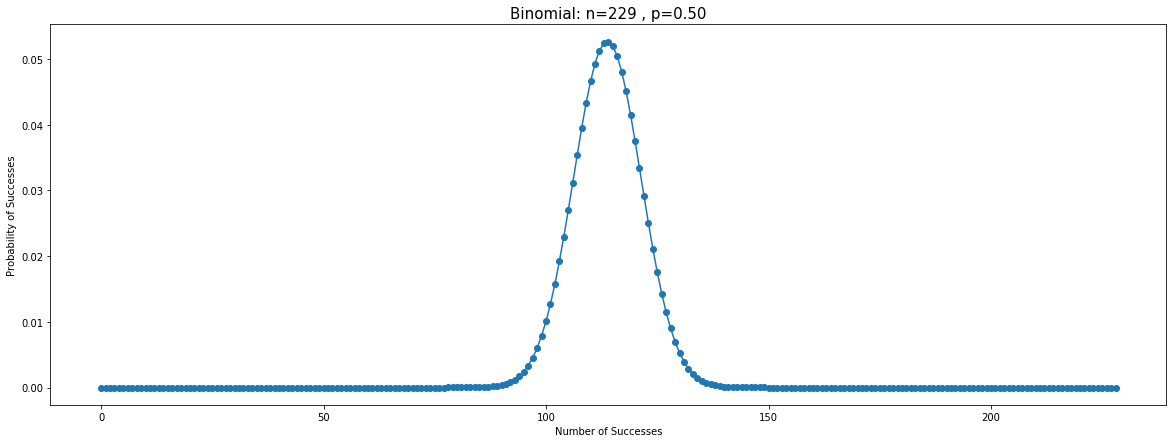

In [18]:
plt.figure(figsize=(20,7))
plt.plot(k,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
